## Objective

Forex is the largest market in the world,  predicting the movement of prices is not a simple task, this dataset pretends to be the gateway for people who want to conduct trading using machine learning.


This dataset contains 4479 simulated winning transactions (real data, fictitious money) (3 years 201408-201708) with 
- buy transactions (2771 operations 50.7%) 
- sell (2208 transactions, 49.3%)

to generate this data a script of metatrader was used, operations were performed in time frame 4Hour and fixed stop loss and take profits of 50 pips (4 digits) were used to determine if the operation is winning. Each operation contains a set of classic technical indicators like rsi, mom, bb, emas, etc. (last 24 hours)


Prediction output (y)
- tipo = 0 ==> Operation buy
- tipo = 1 ==> Operation sell



In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')


from sklearn.metrics import classification_report
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import xgboost as xgb
from xgboost import XGBClassifier


import lightgbm as lgb

from sklearn.externals import joblib




In [2]:
## read data
df = pd.read_csv('data/dataset01_eurusd4h.csv', delimiter=',')


In [3]:
df.head()

,rsi1,rsi2,rsi3,rsi4,rsi5,rsi6,stoch1,stoch2,stoch3,stoch4,...,WPR6,close1,close2,close3,close4,close5,close6,hour,dayOfWeek,tipo
0,28.90,31.07,40.01,40.51,39.95,41.98,13.53,29.27,46.80,43.52,...,-56.09,1.3132,1.3132,1.3132,1.3132,1.3132,1.3132,0,1,1
1,27.39,28.90,31.07,40.01,40.51,39.95,3.93,13.53,29.27,46.80,...,-65.93,1.3125,1.3125,1.3125,1.3125,1.3125,1.3125,4,1,1
2,28.41,27.39,28.90,31.07,40.01,40.51,4.27,3.93,13.53,29.27,...,-68.07,1.3127,1.3127,1.3127,1.3127,1.3127,1.3127,8,1,1
3,34.48,28.41,27.39,28.90,31.07,40.01,12.99,4.27,3.93,13.53,...,-74.34,1.3138,1.3138,1.3138,1.3138,1.3138,1.3138,12,1,1
4,33.35,34.48,28.41,27.39,28.90,31.07,24.48,12.99,4.27,3.93,...,-92.30,1.3134,1.3134,1.3134,1.3134,1.3134,1.3134,16,1,1


In [4]:
df.describe()

,rsi1,rsi2,rsi3,rsi4,rsi5,rsi6,stoch1,stoch2,stoch3,stoch4,...,WPR6,close1,close2,close3,close4,close5,close6,hour,dayOfWeek,tipo
count,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,...,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000
mean,49.212367,49.218281,49.205930,49.192480,49.175113,49.173878,48.331369,48.359949,48.334941,48.322737,...,-52.205039,1.124408,1.124408,1.124408,1.124408,1.124408,1.124408,10.009377,2.993525,0.492967
std,13.057891,13.077693,13.094429,13.103938,13.109520,13.109564,24.638529,24.653636,24.645165,24.672112,...,29.304558,0.057511,0.057511,0.057511,0.057511,0.057511,0.057511,6.828558,1.413804,0.500006
min,12.200000,12.200000,12.200000,12.200000,12.200000,12.200000,2.040000,2.040000,2.040000,2.040000,...,-100.000000,1.036900,1.036900,1.036900,1.036900,1.036900,1.036900,0.000000,0.000000,0.000000
25%,40.045000,40.045000,40.035000,40.025000,40.010000,39.945000,26.775000,26.780000,26.775000,26.705000,...,-79.130000,1.087800,1.087800,1.087800,1.087800,1.087800,1.087800,4.000000,2.000000,0.000000
50%,48.700000,48.730000,48.710000,48.670000,48.700000,48.710000,48.290000,48.480000,48.380000,48.290000,...,-52.980000,1.115600,1.115600,1.115600,1.115600,1.115600,1.115600,8.000000,3.000000,0.000000
75%,58.210000,58.210000,58.215000,58.255000,58.305000,58.355000,69.750000,69.660000,69.635000,69.570000,...,-25.615000,1.135700,1.135700,1.135700,1.135700,1.135700,1.135700,16.000000,4.000000,1.000000
max,87.280000,87.280000,87.280000,87.280000,87.280000,87.280000,97.620000,97.620000,97.620000,97.620000,...,0.000000,1.314900,1.314900,1.314900,1.314900,1.314900,1.314900,23.000000,5.000000,1.000000


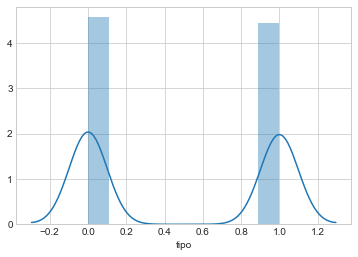

In [7]:
# dist histogram on sales price
sns.distplot( df['tipo'])

In [8]:
## check null value
df.isnull().sum()

rsi1            0
rsi2            0
rsi3            0
rsi4            0
rsi5            0
rsi6            0
stoch1          0
stoch2          0
stoch3          0
stoch4          0
stoch5          0
stoch6          0
ema20Slope1     0
ema20Slope2     0
ema20Slope3     0
ema20Slope4     0
ema20Slope5     0
ema20Slope6     0
ema50Slope1     0
ema50Slope2     0
ema50Slope3     0
ema50Slope4     0
ema50Slope5     0
ema50Slope6     0
ema100Slope1    0
ema100Slope2    0
ema100Slope3    0
ema100Slope4    0
ema100Slope5    0
ema100Slope6    0
               ..
macd4           0
macd5           0
macd6           0
bearsPower1     0
bearsPower2     0
bearsPower3     0
bearsPower4     0
bearsPower5     0
bearsPower6     0
bullsPower1     0
bullsPower2     0
bullsPower3     0
bullsPower4     0
bullsPower5     0
bullsPower6     0
WPR1            0
WPR2            0
WPR3            0
WPR4            0
WPR5            0
WPR6            0
close1          0
close2          0
close3          0
close4    

## train-test split

In [10]:
#split


X= df.drop(columns = 'tipo')
y= df['tipo']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) ## test sample 20%


## Model - RandomForest Classifier

In [35]:

rf_clf = RandomForestClassifier(random_state=0, n_estimators=750).fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7834821428571429

In [36]:
## make prediction

predictions = rf_clf.predict(X_test)


## evaluation metrics
print ('AUC:', metrics.roc_auc_score(y_test, predictions))
print ('Precision:', metrics.precision_score(y_test, predictions))
print ('Recall:', metrics.recall_score(y_test, predictions))

AUC: 0.7828564023068142
Precision: 0.7951807228915663
Recall: 0.7517084282460137


In [37]:
print(classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       457
           1       0.80      0.75      0.77       439

    accuracy                           0.78       896
   macro avg       0.78      0.78      0.78       896
weighted avg       0.78      0.78      0.78       896



## Model - Xgboost Classifier

In [30]:
# fit model no training data
xgb_clf = XGBClassifier( n_estimators=700,  max_depth=5,learning_rate=0.05 )
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
## make prediction

predictions = xgb_clf.predict(X_test)


## evaluation metrics
print ('AUC:', metrics.roc_auc_score(y_test, predictions))
print ('Precision:', metrics.precision_score(y_test, predictions))
print ('Recall:', metrics.recall_score(y_test, predictions))

AUC: 0.7544548730703858
Precision: 0.7471783295711061
Recall: 0.7539863325740319


In [34]:
print(classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       457
           1       0.75      0.75      0.75       439

    accuracy                           0.75       896
   macro avg       0.75      0.75      0.75       896
weighted avg       0.75      0.75      0.75       896



## xgboost variable importance plot

In [28]:
# xgb.plot_importance(xgb_clf)
# plt.rcParams['figure.figsize'] = [18, 12 ]
# plt.show()

In [29]:
## show top 20 important variables

results=pd.DataFrame()

results['columns']= X_train.columns

results['importances'] = xgb_clf.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)


## top n field importance score
results[:20]


,columns,importances
5,rsi6,0.031471
81,bullsPower4,0.026526
66,macd1,0.024173
12,ema20Slope1,0.021994
15,ema20Slope4,0.020774
69,macd4,0.019753
0,rsi1,0.019496
35,ema200Slope6,0.019055
45,mom4,0.018179
34,ema200Slope5,0.017879


## summary & future work

to achieve higher success rate in forex trading, there are 3 elements:

1) fundamental
- intrinsic market values, currency, central bank policy, GDP, inflation rate

2) technical 
- RSI, stochastic, SMA, fiboniccio ratio

3) market sentiment
- trader report - commercial , speculator,
- long / short ratio

As current dataset purely focus on (2) technical, for future work, we can add in the fundamental factor and market sentiment to give us better understanding and feature to model the price movement

